In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [ ]:
import scanpy as sc 
import sys 
sys.path.append('../../src')

from spaceoracle.prophets import Prophet

In [3]:
adata_train = sc.read_h5ad(
    '/ix/djishnu/shared/djishnu_kor11/training_data/survey_kidney.h5ad')

save_dir = '/ix/djishnu/shared/djishnu_kor11/results/survey_kidney'

pythia = Prophet(
    adata=adata_train,
    models_dir='/ix/djishnu/shared/djishnu_kor11/models_kidney',
    annot='cluster_cat',
    annot_labels='ct2'
)

In [4]:
pythia.compute_betas()

100%|██████████| 2285/2285 [01:16<00:00, 29.75it/s]


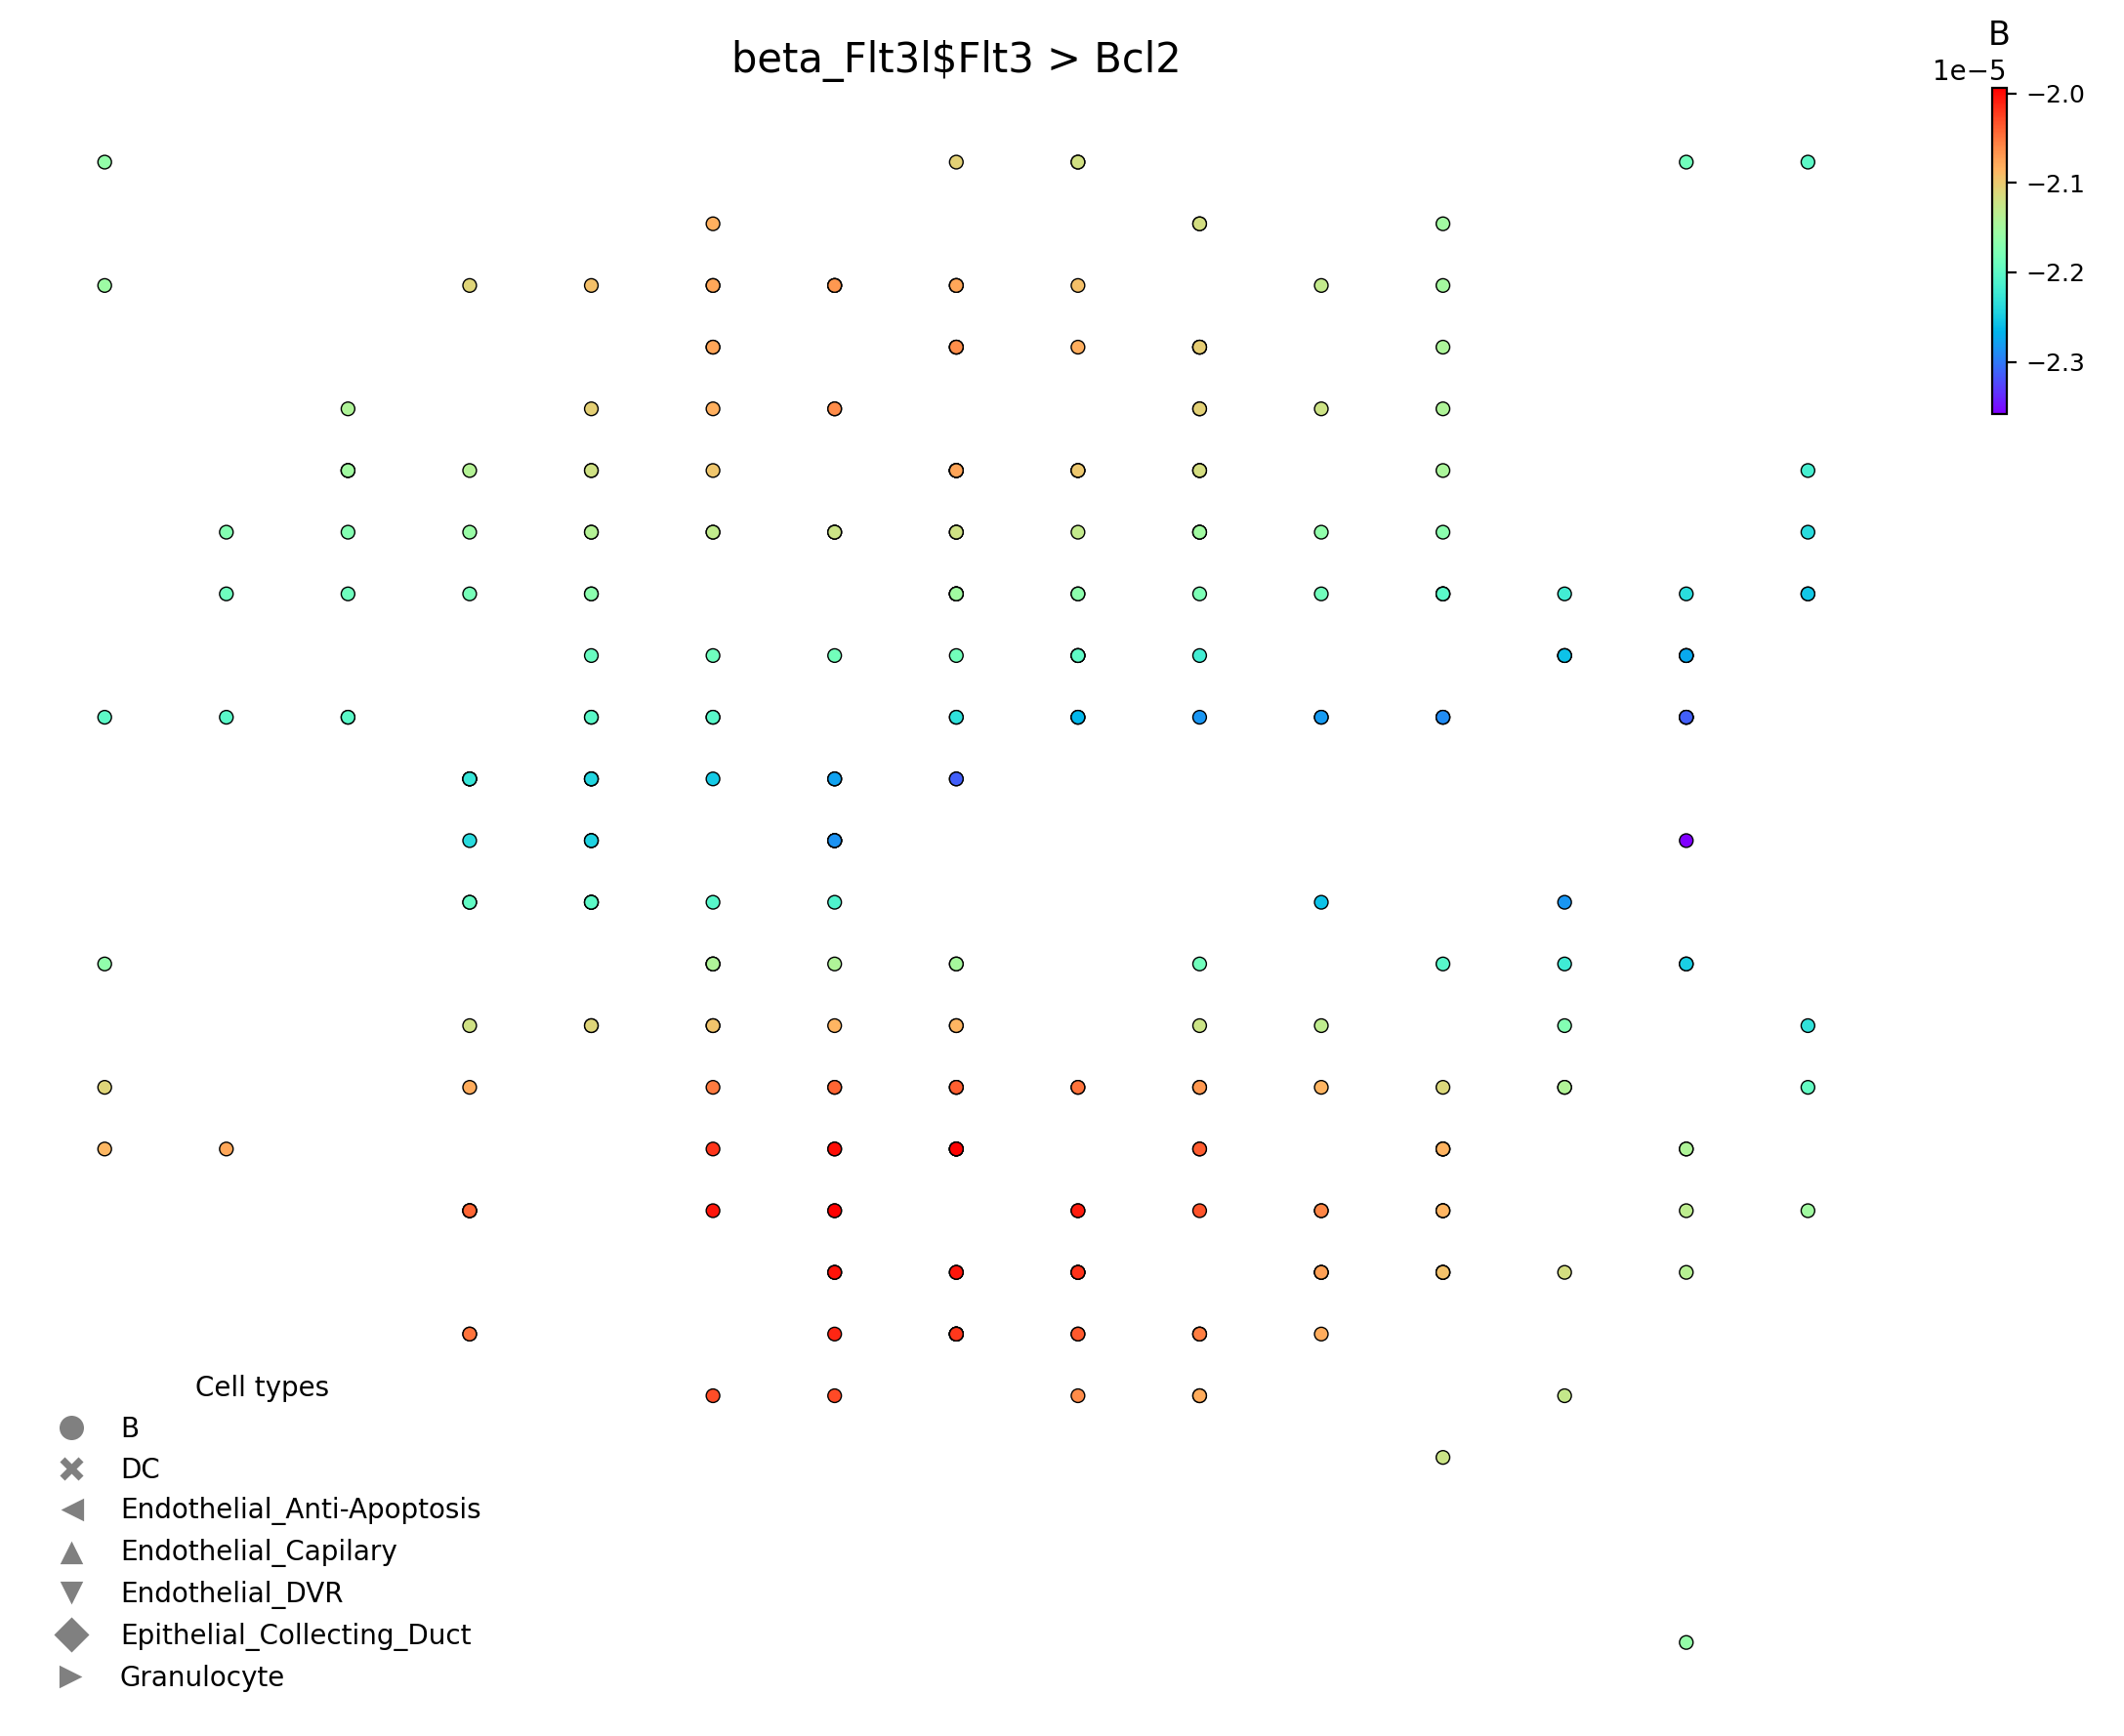

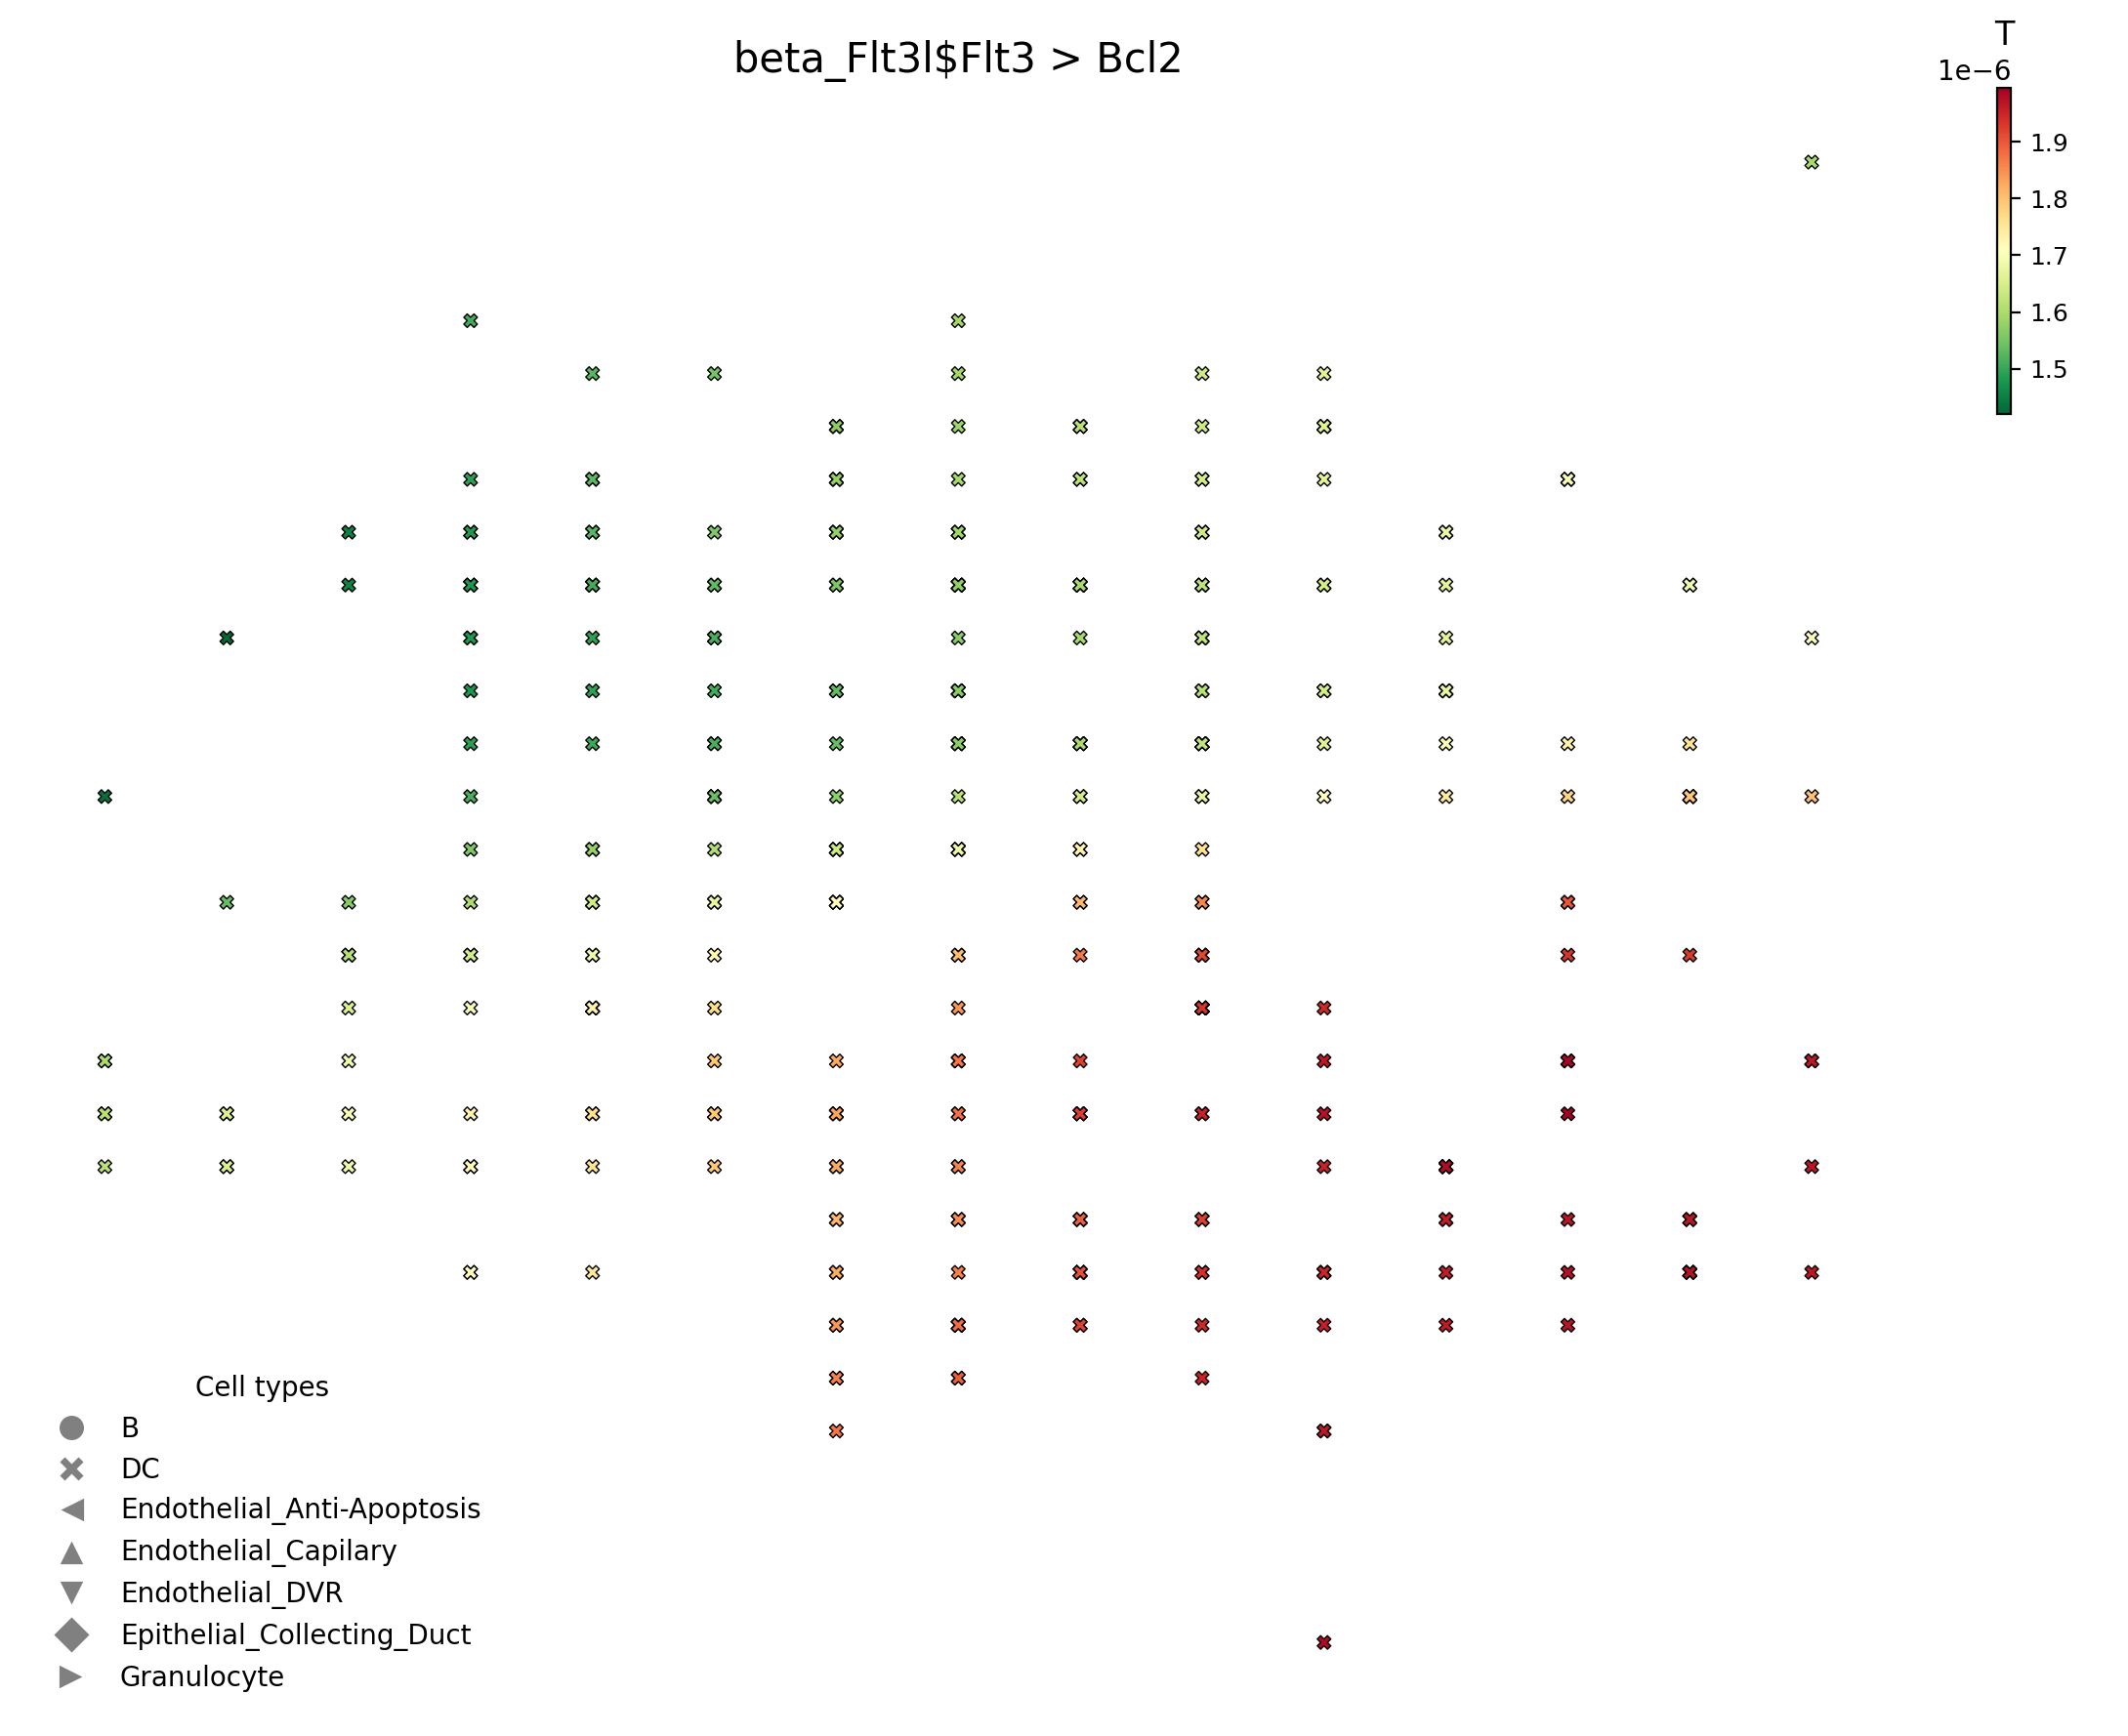

In [5]:
pythia.plot_beta_map(
    regulator='Flt3l$Flt3', 
    target_gene='Bcl2',
    save_dir=f'{save_dir}/beta_maps/',
    clusters=[0]
)
pythia.plot_beta_map(
    regulator='Flt3l$Flt3', 
    target_gene='Bcl2',
    save_dir=f'{save_dir}/beta_maps/',
    clusters=[8]
)

In [5]:
goi = 'Flt3'
goi in pythia.adata.var_names

True

In [6]:
# pythia.plot_betas_goi(goi=goi, use_simulated=False, clusters=['B']),

In [7]:
pythia.perturb(target=goi, n_propagation=1, gene_expr=0) # set to one for testing purposes

Running simulation 1/1: 100%|██████████| 6959/6959 [04:00<00:00, 28.88it/s]


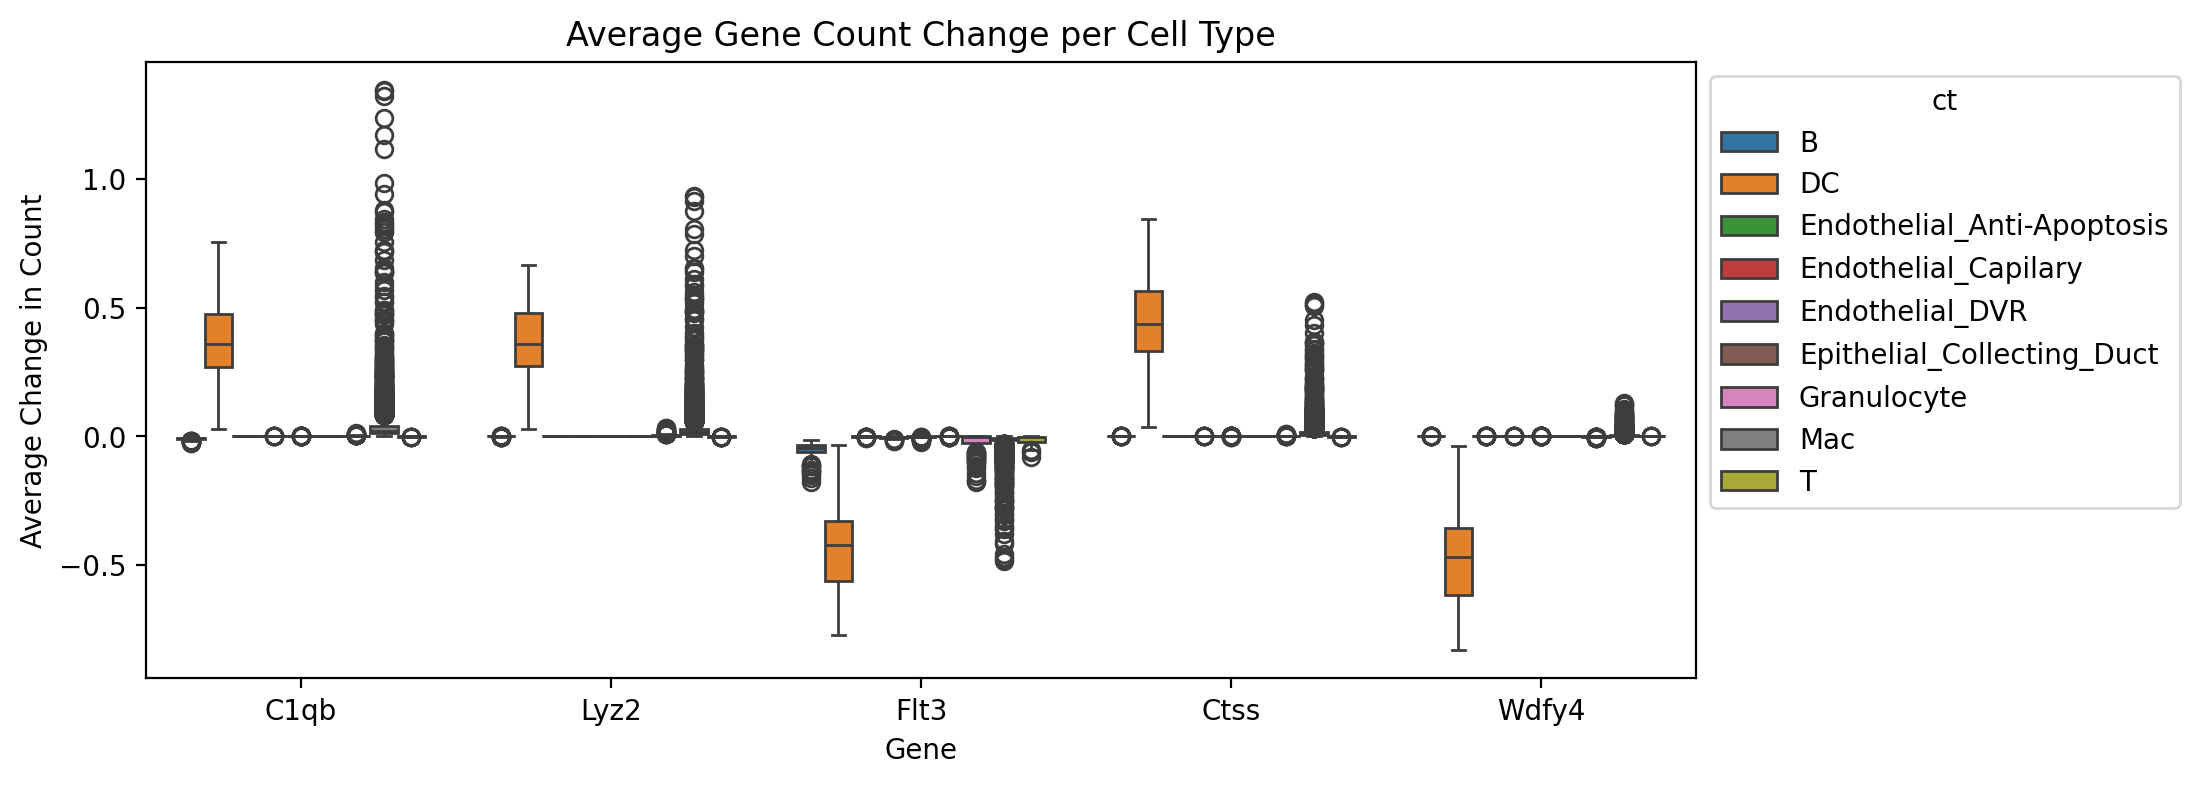

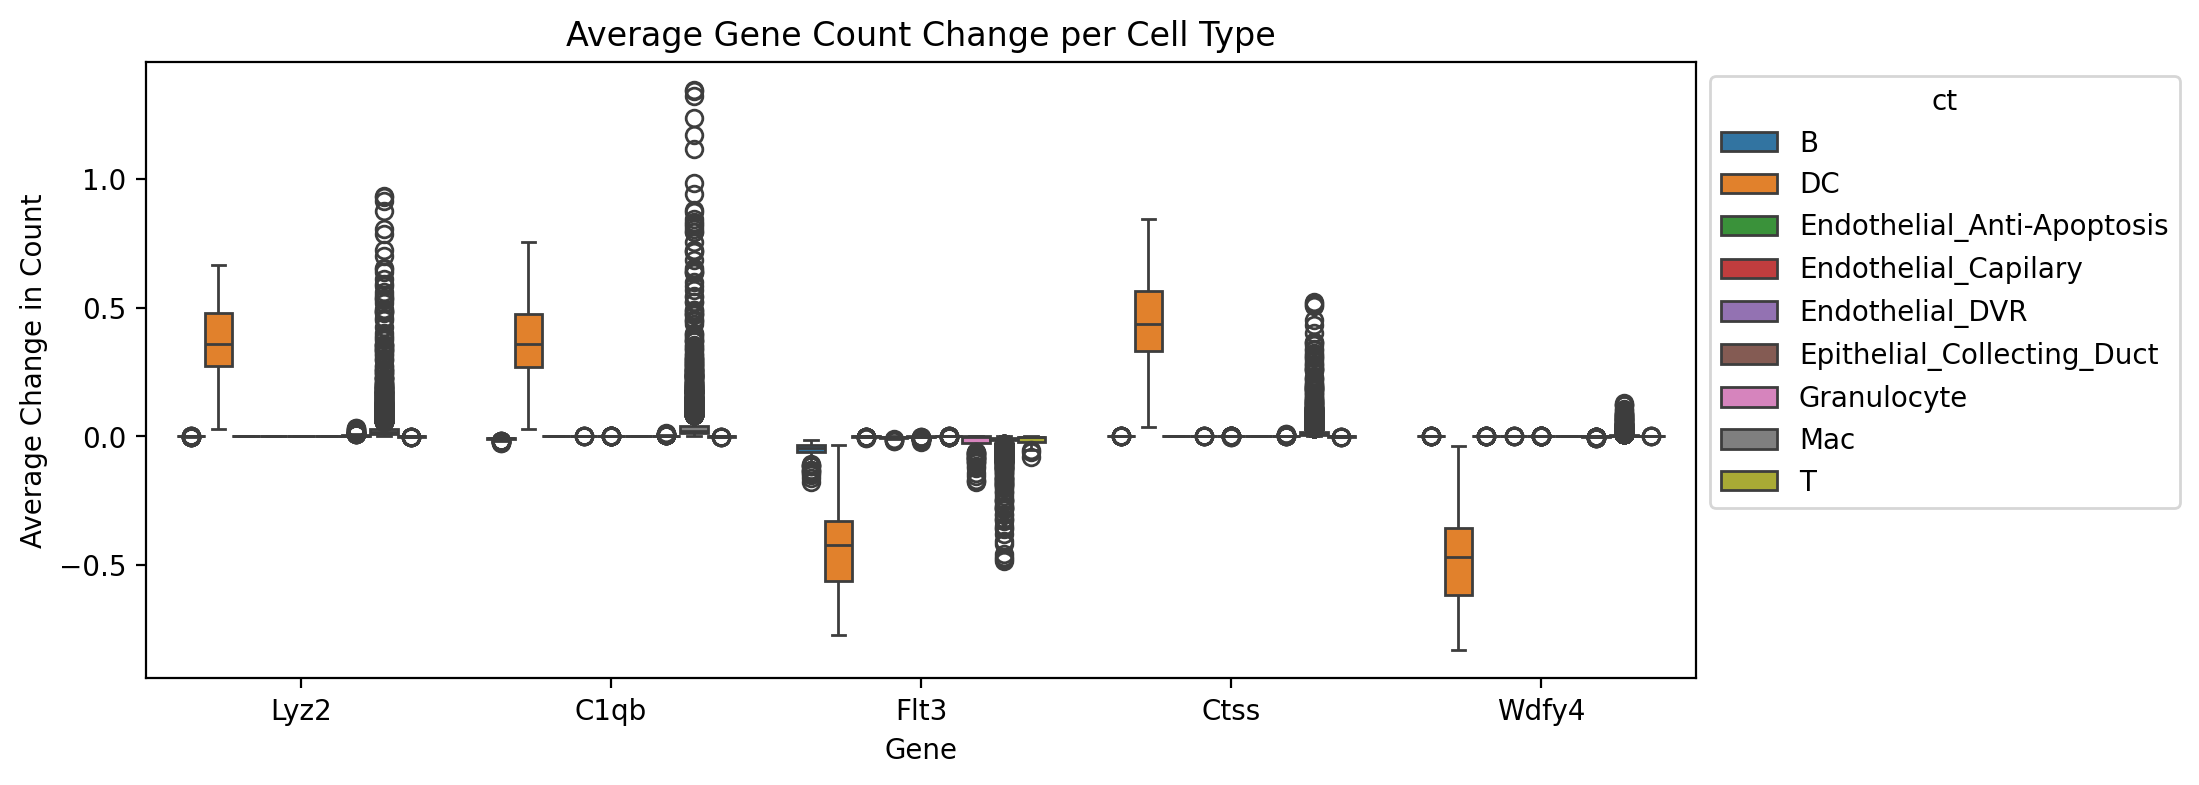

In [8]:
pythia.plot_delta_scores(n_show=5, compare_ct=False)
pythia.plot_delta_scores(n_show=5, compare_ct=True)

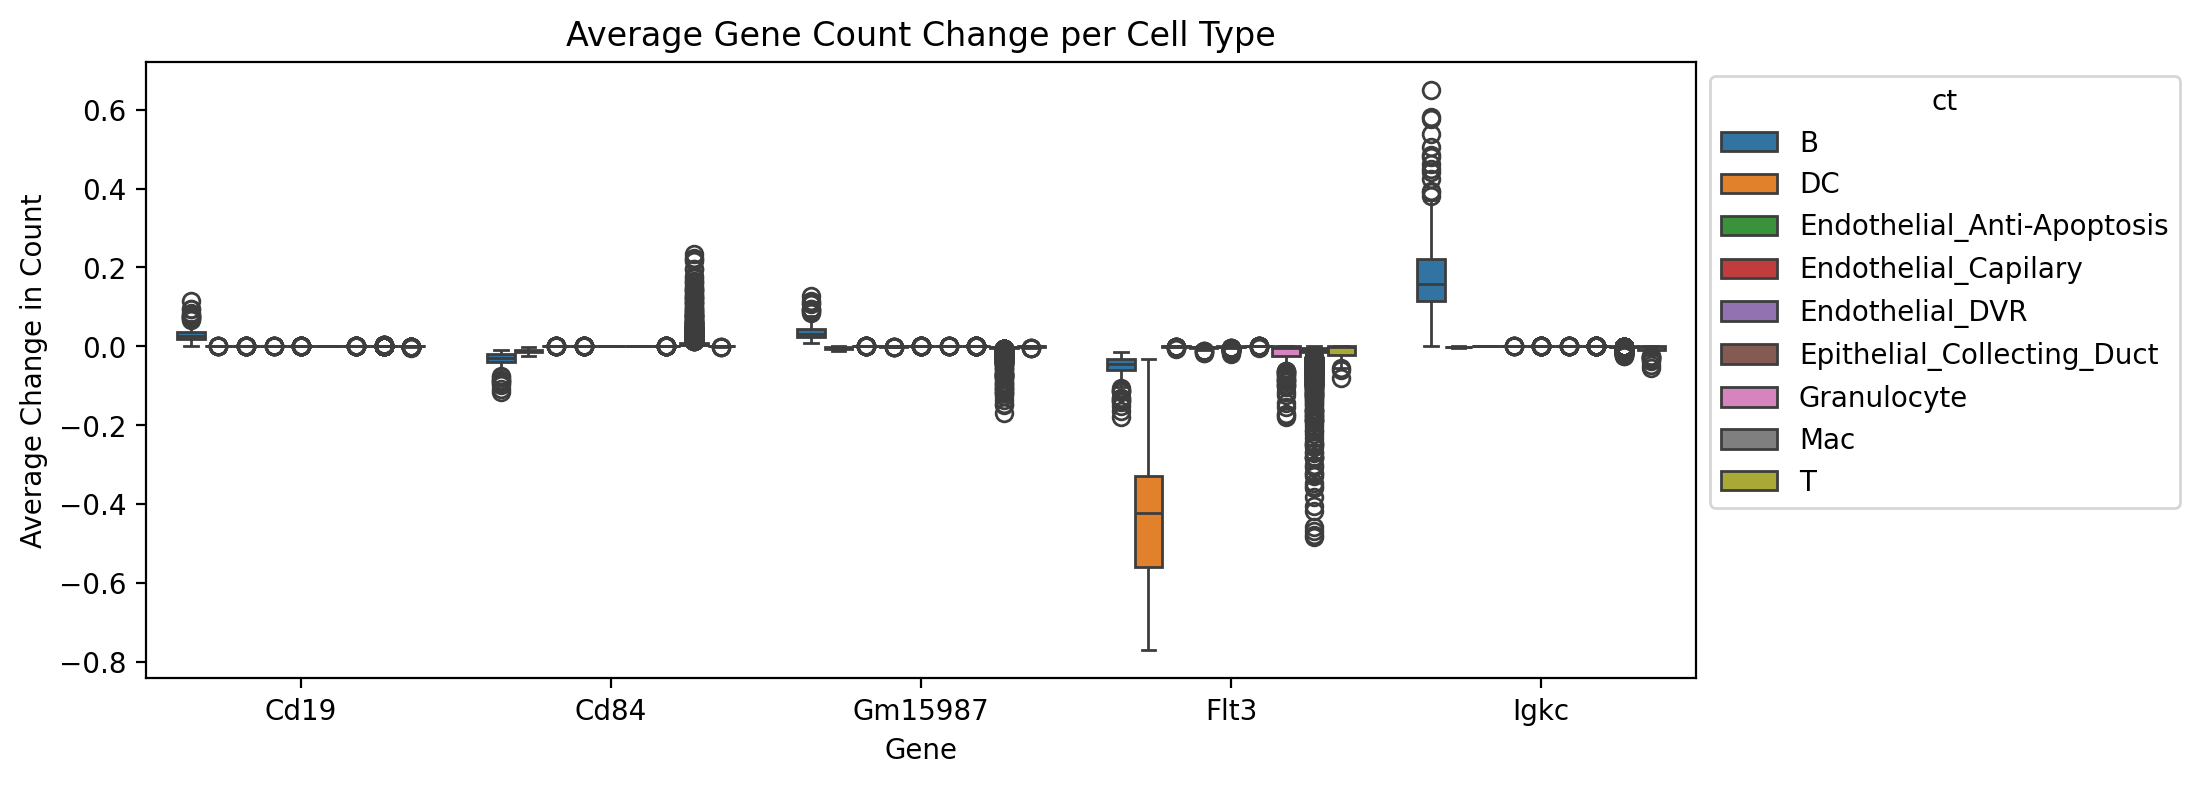

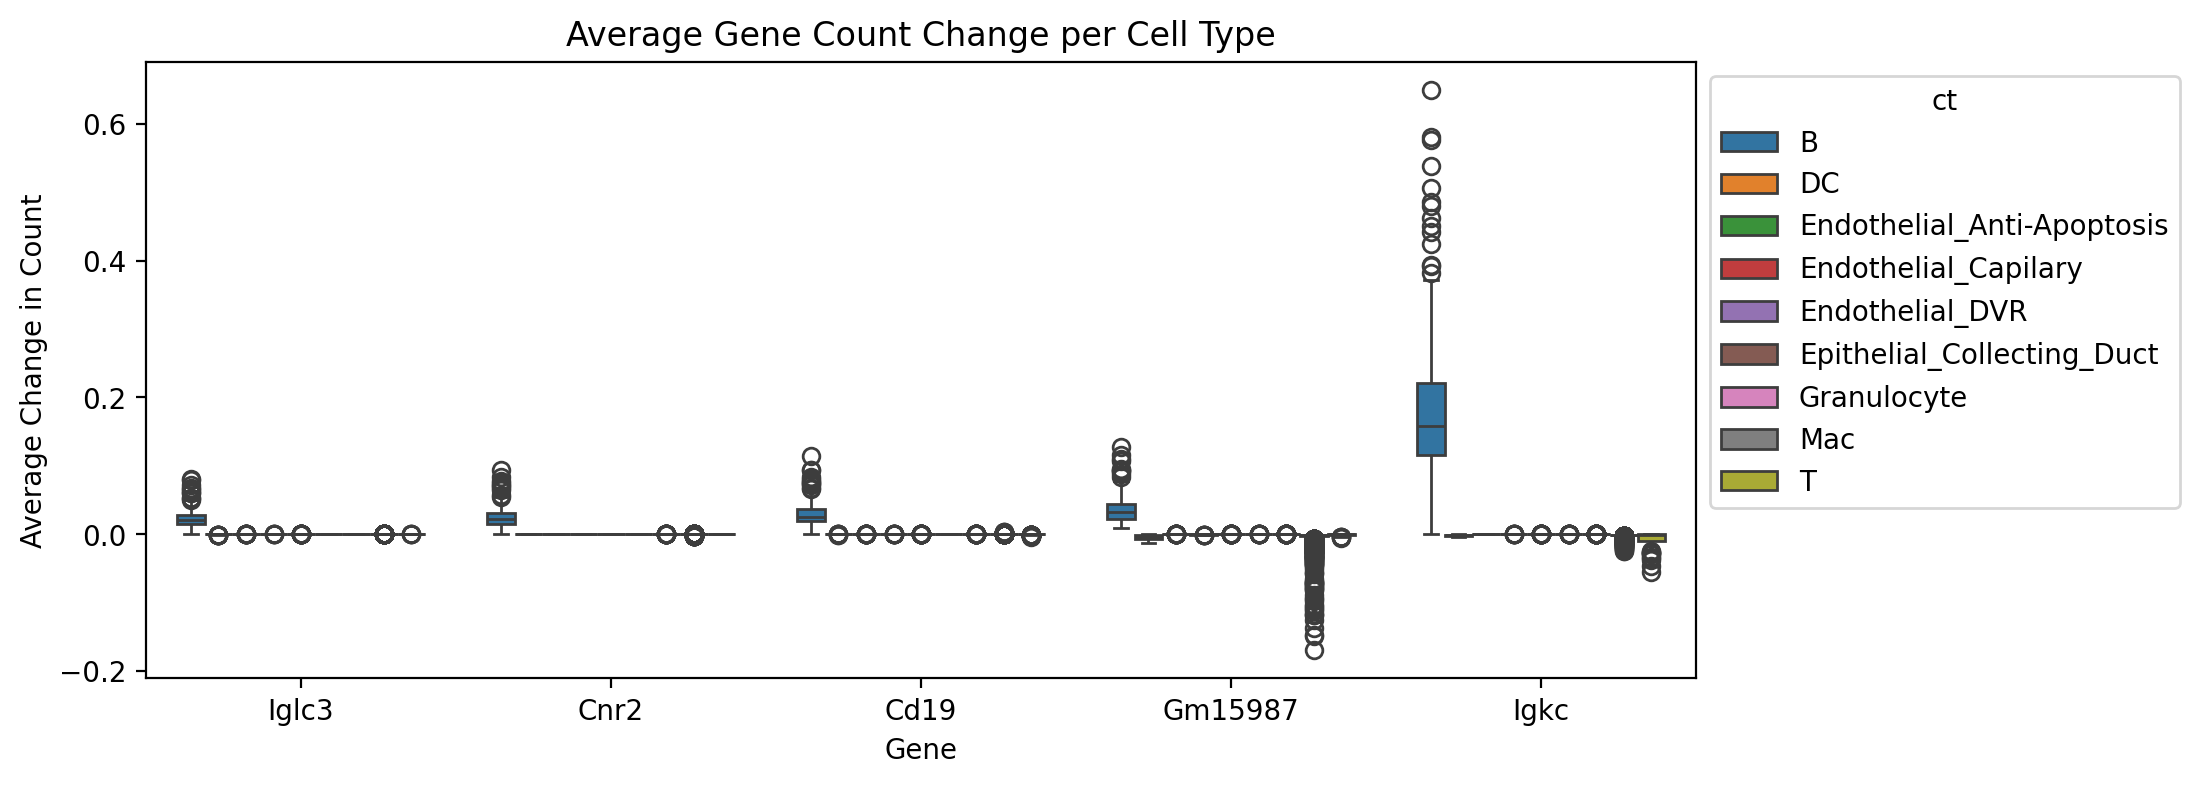

In [13]:
pythia.plot_delta_scores(n_show=5, compare_ct=False, ct_interest='B')
pythia.plot_delta_scores(n_show=5, compare_ct=True, ct_interest='B')

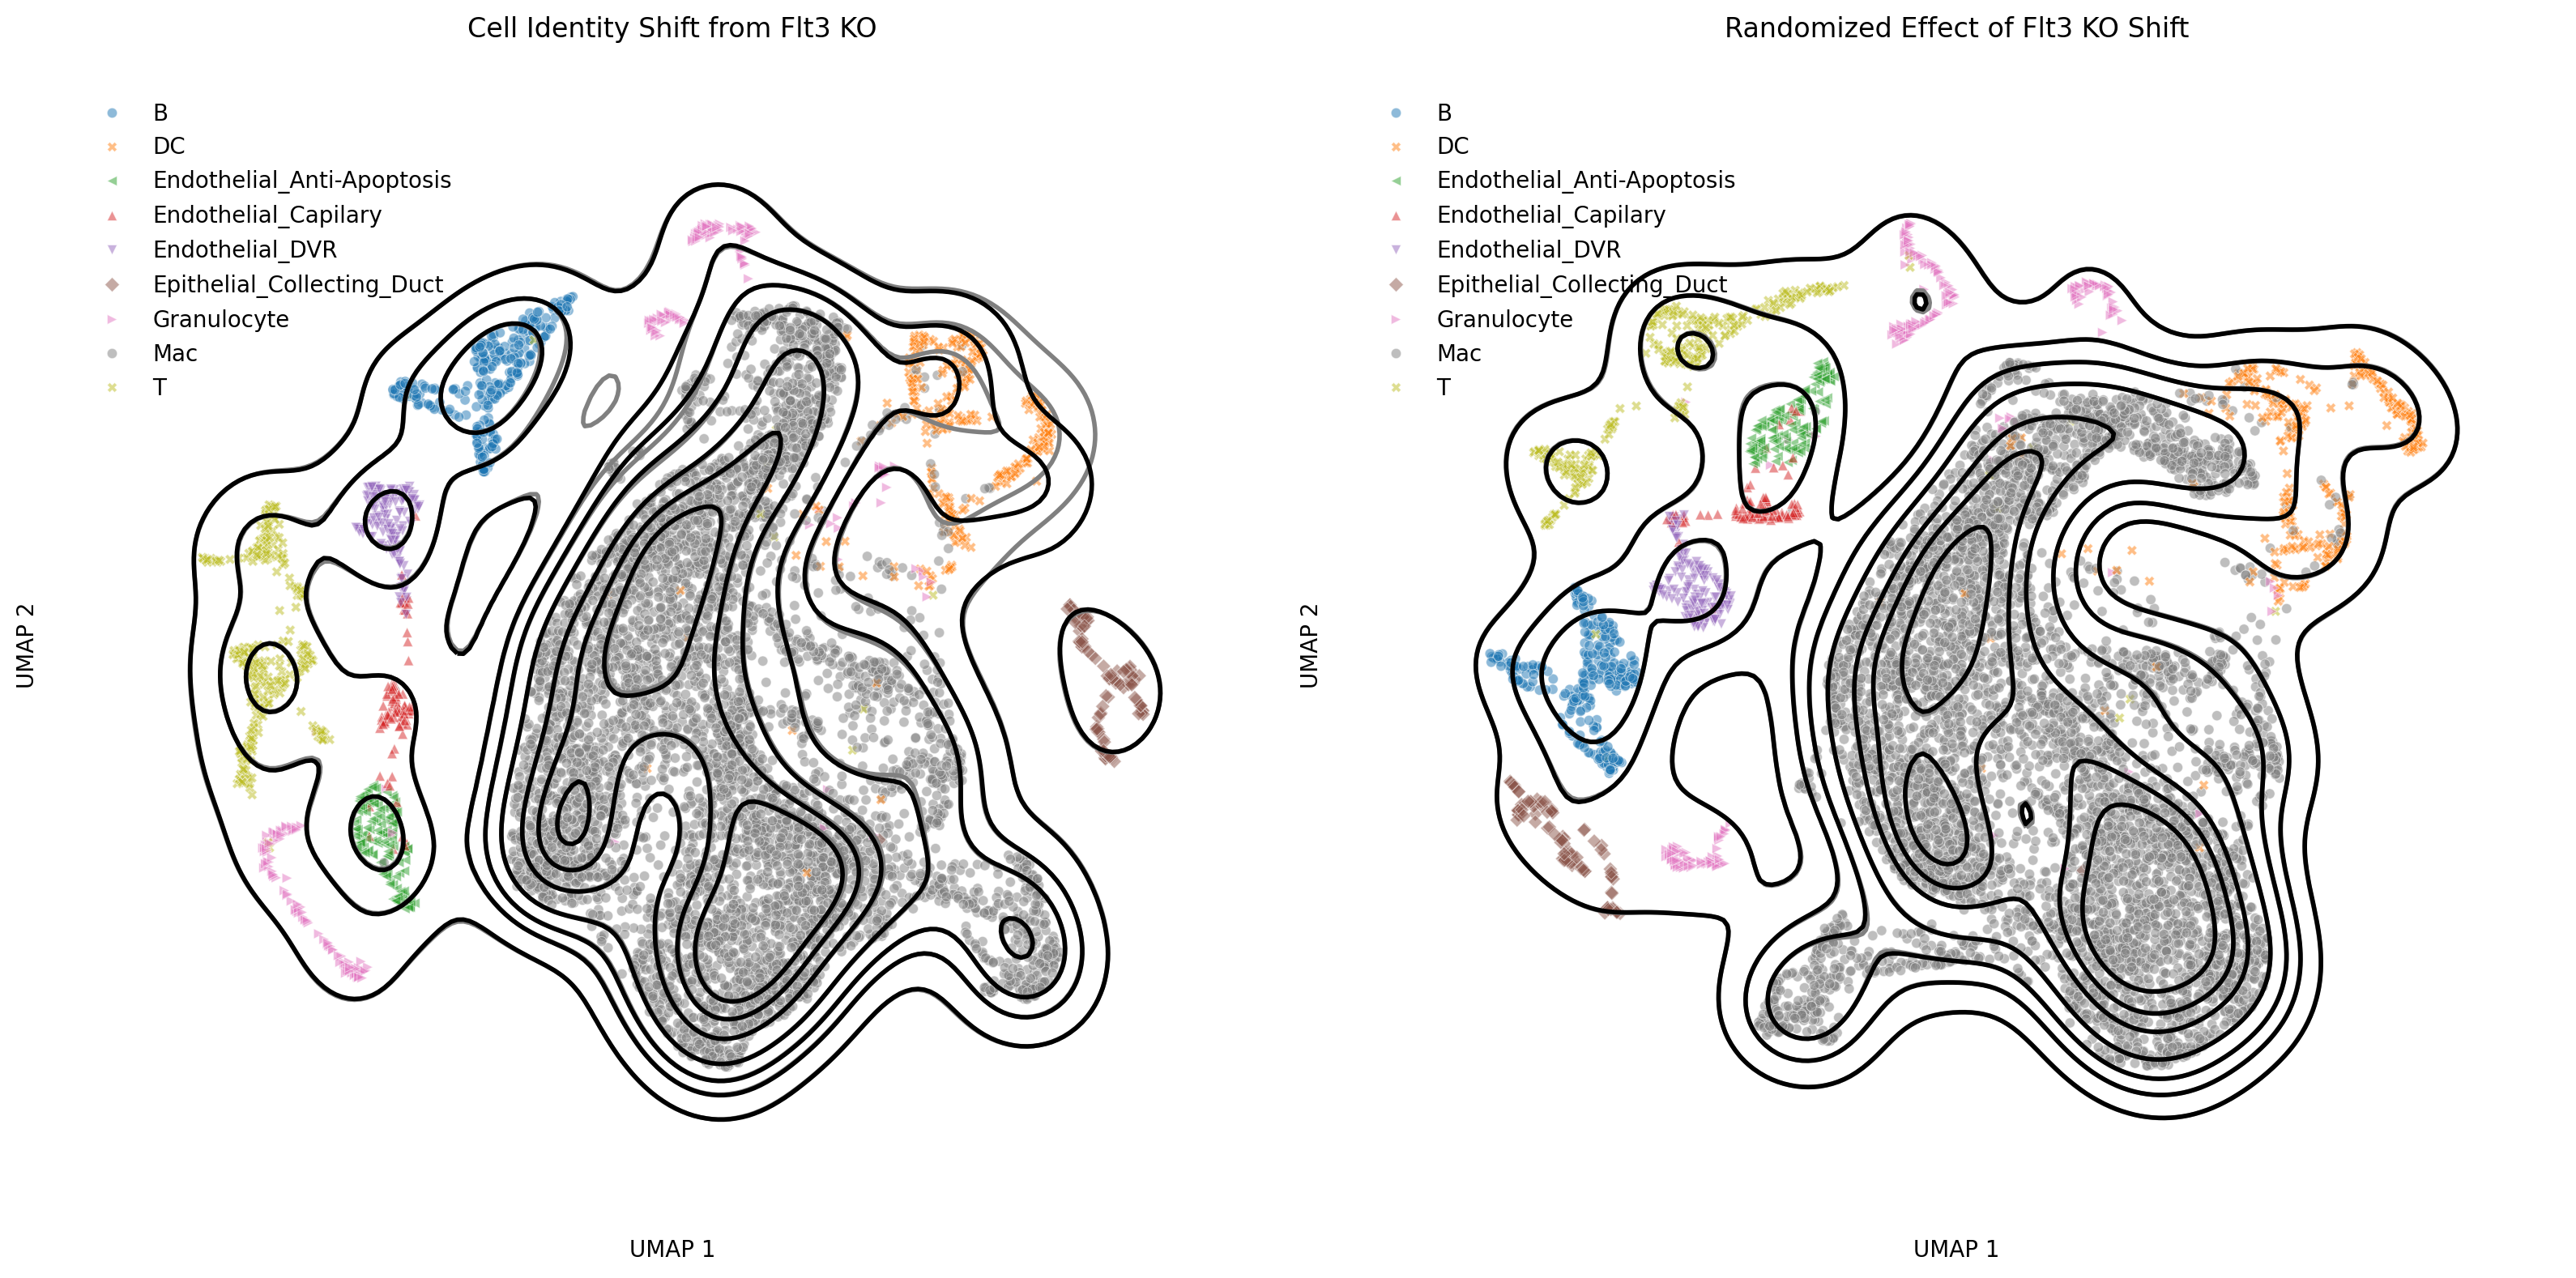

In [16]:
pythia.plot_contour_shift(savepath=f'{save_dir}/{goi}_contour_shift.png')

2.27667627184823


Computing vectors: 100%|██████████| 3630/3630 [00:00<00:00, 21189.93it/s]


2.27667627184823


Computing vectors: 100%|██████████| 3630/3630 [00:00<00:00, 23642.25it/s]


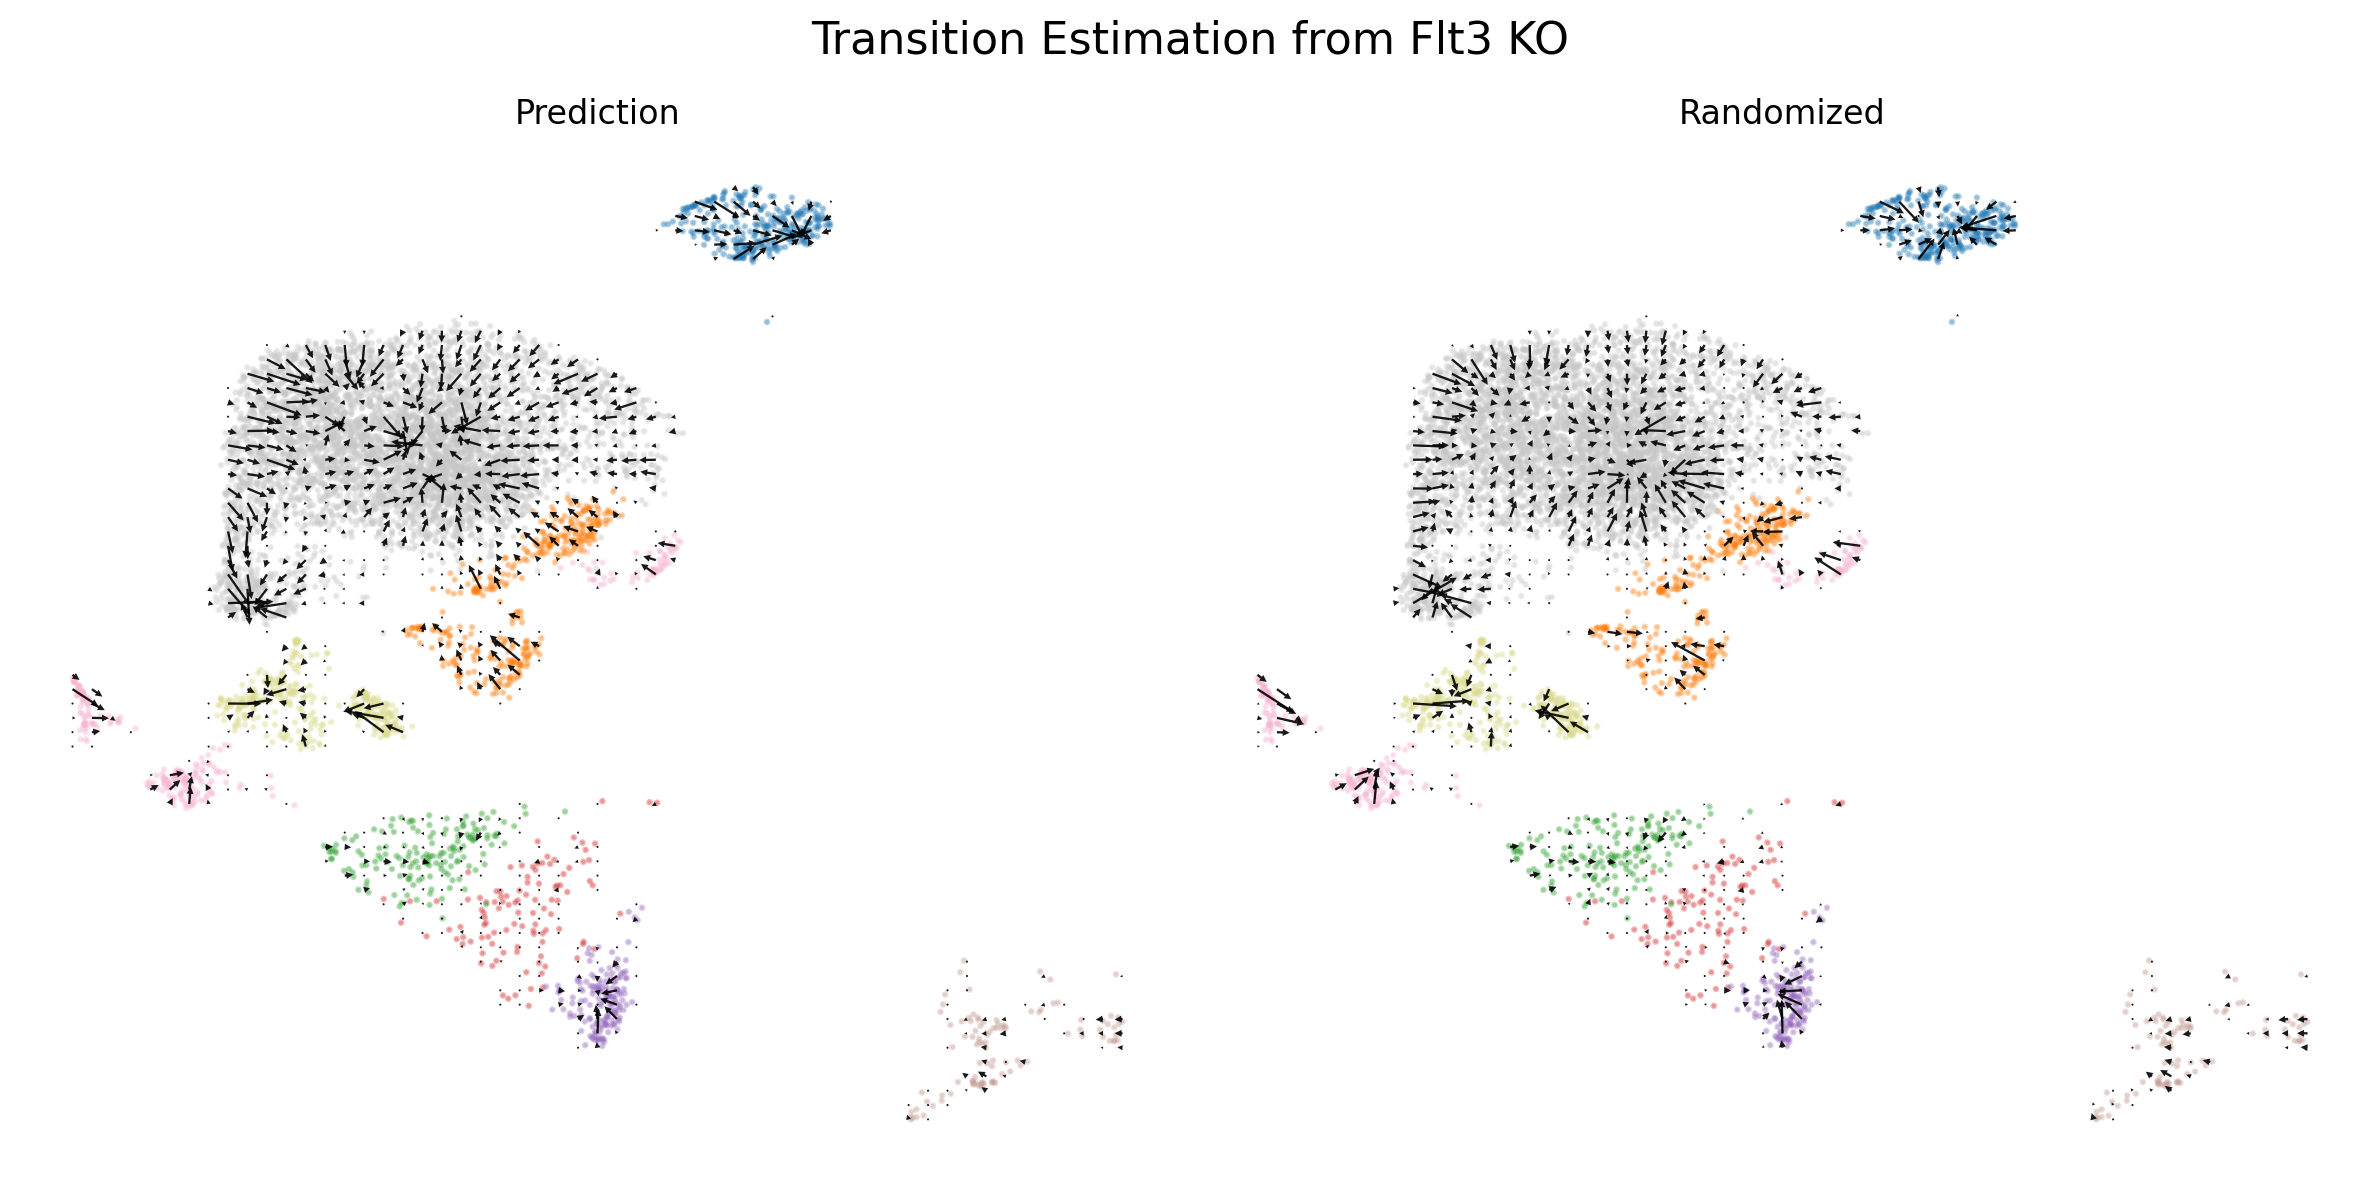

In [13]:
pythia.show_transitions(
    vector_scale=1, 
    layout_embedding=pythia.adata.obsm['X_umap'],
    nn_embedding=pythia.adata.obsm['X_umap'],
    grid_scale=3,
    savepath=f'{save_dir}/transitions_{goi}.png'
)

2.27667627184823


Computing vectors: 100%|██████████| 3630/3630 [00:00<00:00, 23470.70it/s]


2.27667627184823


Computing vectors: 100%|██████████| 3630/3630 [00:00<00:00, 24169.21it/s]


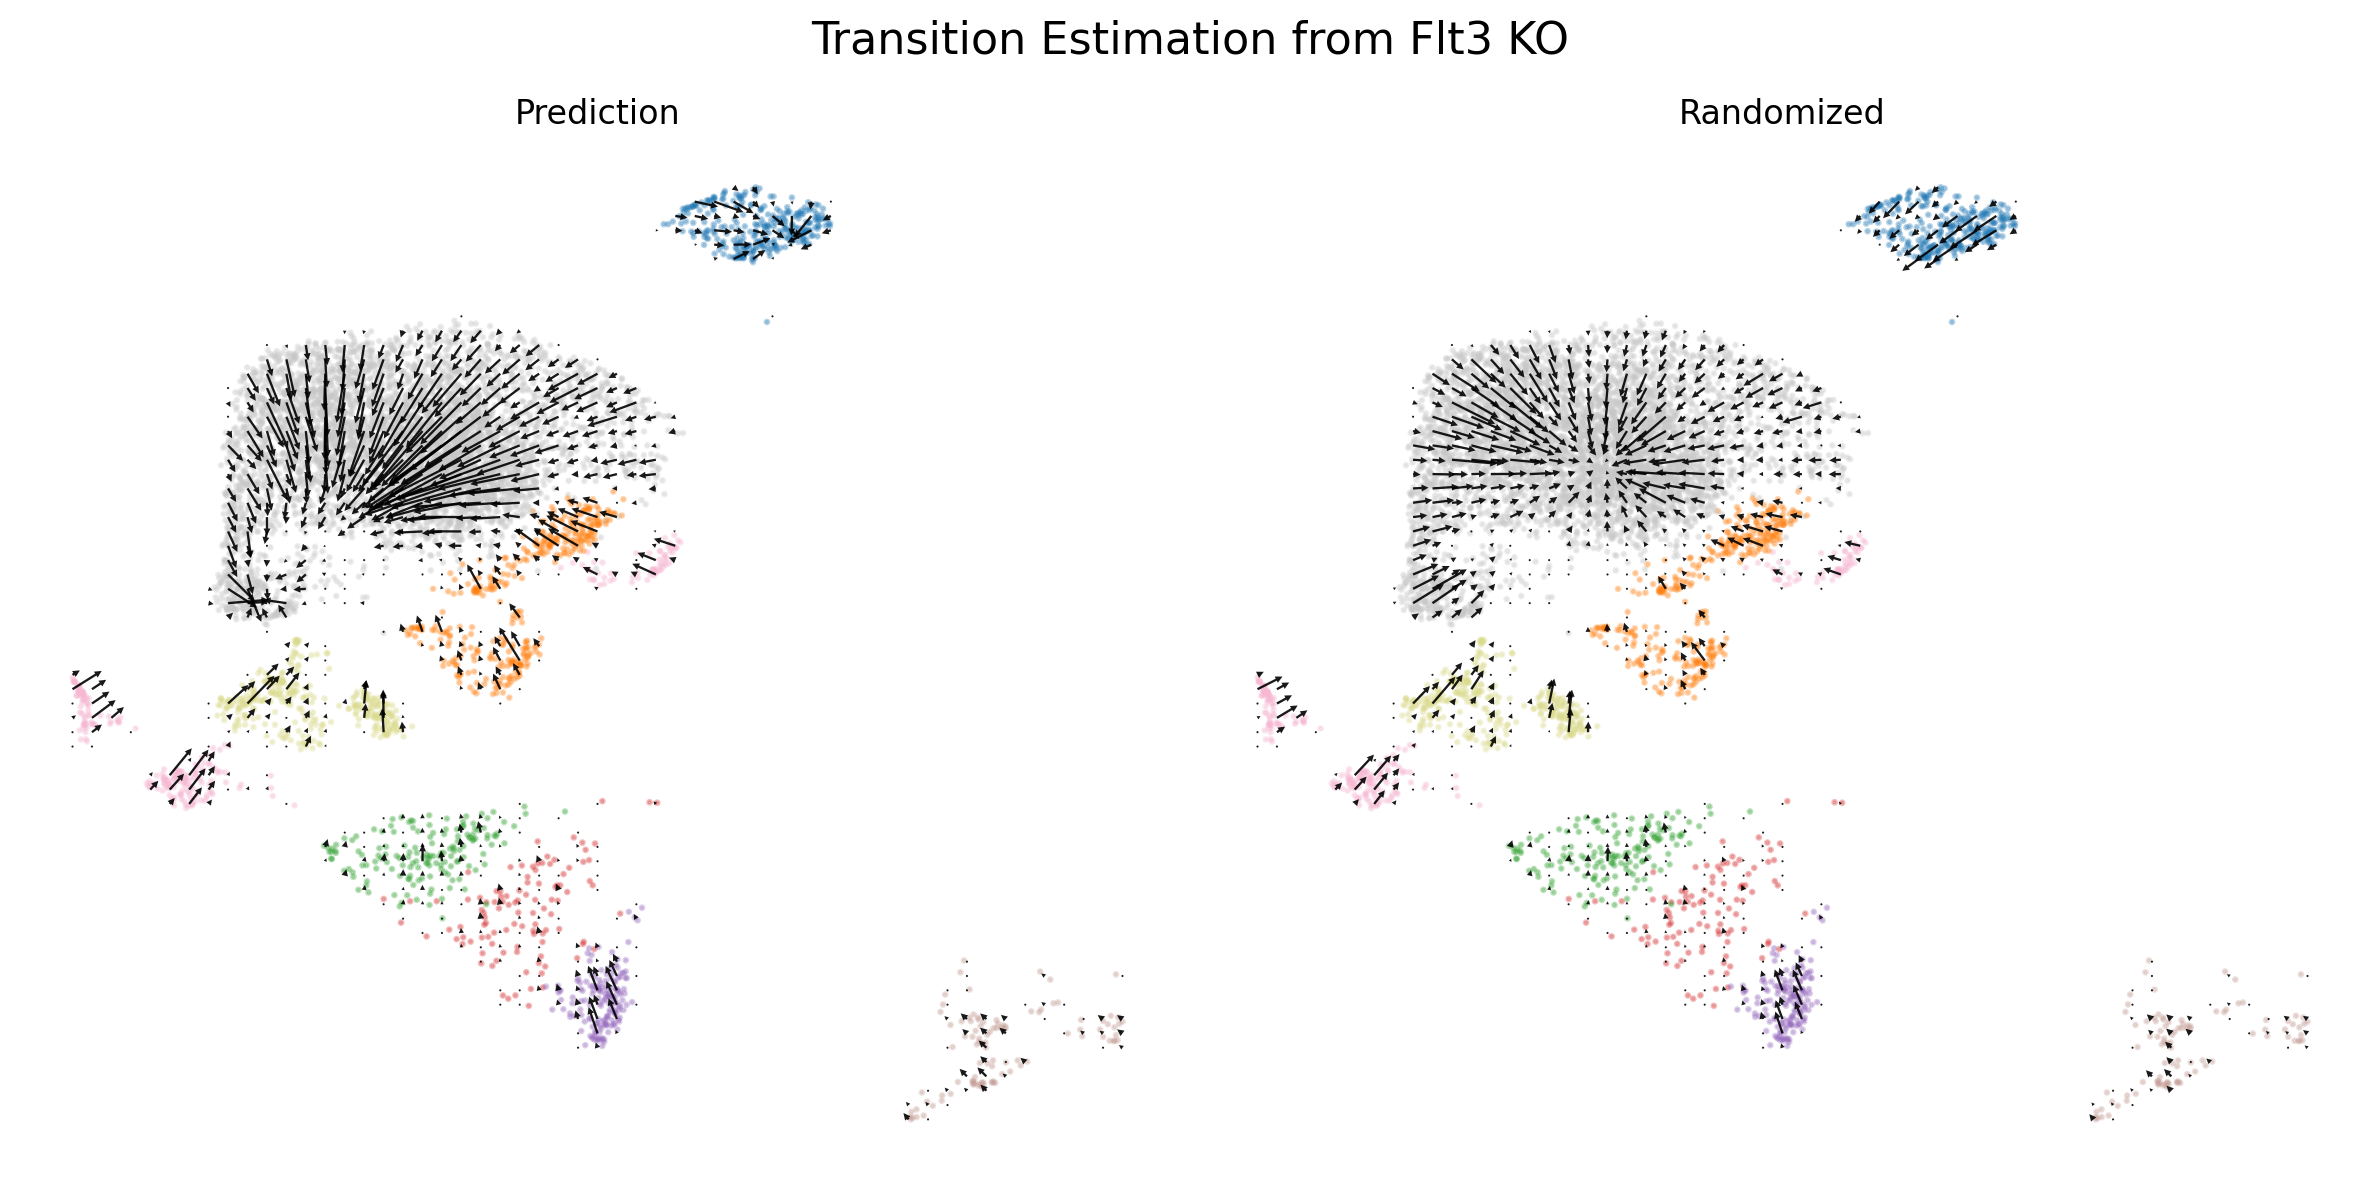

In [14]:
pythia.show_transitions(
    vector_scale=1, 
    layout_embedding=pythia.adata.obsm['X_umap'],
    nn_embedding=pythia.adata.obsm['spatial'],
    grid_scale=3,
    savepath=f'{save_dir}/transitions_{goi}.png'
)

In [ ]:
pythia.show_transitions(
    vector_scale=1, 
    layout_embedding=pythia.adata.obsm['spatial'],
    nn_embedding=pythia.adata.obsm['spatial'],
    grid_scale=3,
    savepath=f'{save_dir}/transitions_{goi}.png'
)

In [ ]:
pythia.plot_beta_neighborhoods()
# pythia.plot_beta_umap(use_modulators=False)

In [ ]:
pythia.show_cluster_gex(embedding='UMAP')